<a href="https://colab.research.google.com/github/diperezbgit/IA-FUNDAMENTALS/blob/main/TAREA_2/TAREA_2_HC_SA_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Vehicle Routing Problem (VRP) para Optimización de Rutas en Conexiones Eléctricas
### Se tiene una cuadrilla encargada de atender un conjunto de conexiones eléctricas distribuidas en diferentes distritos. El objetivo es optimizar el tiempo total de atención mediante la determinación del orden óptimo en que la cuadrilla debe visitar cada punto de conexión.




### Carga y visualización de imagen GIS de asignación ordenes de trabajo


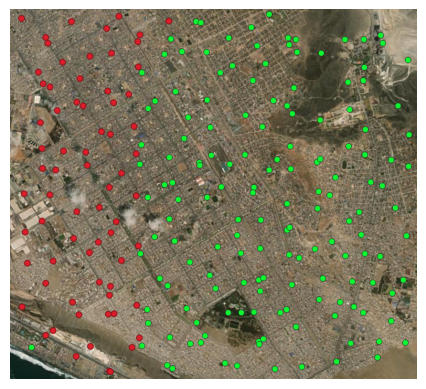

In [188]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

url = 'https://raw.githubusercontent.com/diperezbgit/IA-FUNDAMENTALS/main/TAREA_2/cnx_gis.png'

response = requests.get(url)
img = Image.open(BytesIO(response.content))

plt.imshow(img)
plt.axis('off')  # Quita los ejes
plt.show()


### Importamos el archivo de ubicación de ordenes de trabajo



In [203]:
import pandas as pd
import numpy as np
#  obtenemos al archivo que contiene la informacion sobre las conexiones y ditancias entre ellas
path = r"https://raw.githubusercontent.com/diperezbgit/IA-FUNDAMENTALS/refs/heads/main/TAREA_2/cnx_cuadri02.csv"
df_long = pd.read_csv(path)
# par las pruebas usamos solo 70 puntos
df_reduced = df_long.iloc[:100, :100]
df_reduced


,id,y,x
0,0,8.651913e+06,286690.715164
1,1,8.651592e+06,287093.287133
2,2,8.651016e+06,286976.587931
3,3,8.651502e+06,287134.107559
4,4,8.650819e+06,287052.401729
...,...,...,...
95,95,8.649175e+06,289207.471061
96,96,8.648896e+06,289304.960969
97,97,8.648200e+06,289243.531993
98,98,8.647847e+06,289500.006355


# Funcion plot

In [204]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

def plot_tsp(nodes, route):
    """
    Plot the TSP nodes and route.

    Parameters:
    - nodes: List of tuples containing the coordinates of each node.
    - route: List of node indices representing the TSP route.
    """
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', zorder=2)  # Plot nodes


    for i in range(len(route) - 1):
        node1 = route[i]
        node2 = route[i + 1]
        plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    # Connect the last node to the first node to form a loop
    node1 = route[-1]
    node2 = route[0]
    plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Nodes and Route')
    plt.grid(True)
    plt.show()

# Hill Climbing

In [205]:
def fitness(sol,TSP):
  distance = 0
  for i in range( len(sol) - 1 ):
    distance = distance + TSP[ sol[i]  ][ sol[i+1]  ]
  return distance

def get_neighbors(sol):
  neighbors = []
  for i in range(len(sol) - 1):
    for j in range( i + 1, len(sol) ):
      new_sol = sol.copy()
      new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
      neighbors.append(new_sol)
  return neighbors

def hill_climbing(num_cnx,positions,TSP):
  # step 1: Solucion inicial
  current_solution = np.array(range(num_cnx))
  np.random.shuffle(current_solution)

  plot_tsp(positions, current_solution)

  while True:
    #print("Iteration...")
    # step: generar vecinos
    neighbors = get_neighbors(current_solution)
    best_neighbor = min(neighbors, key=lambda current_solution: fitness(current_solution, TSP))

    #print("current_solution", current_solution)
    #print("fitness current_solution", fitness(current_solution,TSP))
    #print("fitness best_neighbor", fitness(best_neighbor,TSP))

    if fitness(best_neighbor,TSP) < fitness(current_solution,TSP):
      current_solution = best_neighbor
    else:
      return current_solution, fitness(current_solution,TSP)

# Simulated Annealing

In [206]:
def fitness(sol,TSP):
  distance = 0
  for i in range( len(sol) - 1 ):
    distance = distance + TSP[ sol[i]  ][ sol[i+1]  ]
  return distance

def random_neighbor(sol):
  i, j = np.random.choice(len(sol), 2, replace=False) # two random indices
  new_sol = sol.copy()
  new_sol[i], new_sol[j] = new_sol[j], new_sol[i]
  return new_sol

def accept(delta, T):
  if delta < 0:
    return True
  else: # damos la opcion de aceotar soluciones malas.
    r = np.random.rand() # random value between [0, 1]
    if r < np.exp(-delta/T):
      return True
    else:
      return False

def simulated_annealing(T_max, T_min, cooling_rate,positions,TSP):
  T = T_max
  initial_solution= np.array(list(range(len(TSP))))
  np.random.shuffle(initial_solution)

  x = initial_solution.copy()
  E = fitness(x,TSP)
  e_list=[]
  plot_tsp(positions, x)

  #print("temperatura:", T)
  #print("x", x)
  #print("E", E, "\n")

  while (T > T_min) :
    #print("E", E)
    e_list.append(E)
    x_new = random_neighbor(x)
    E_new = fitness(x_new,TSP)
    delta = E_new - E
    #print("iteration, T:", T, " delta:", delta)
    if accept(delta, T):
      x = x_new
      E = E_new

    T = T*cooling_rate
  return x,fitness(x,TSP),e_list

# Comparación

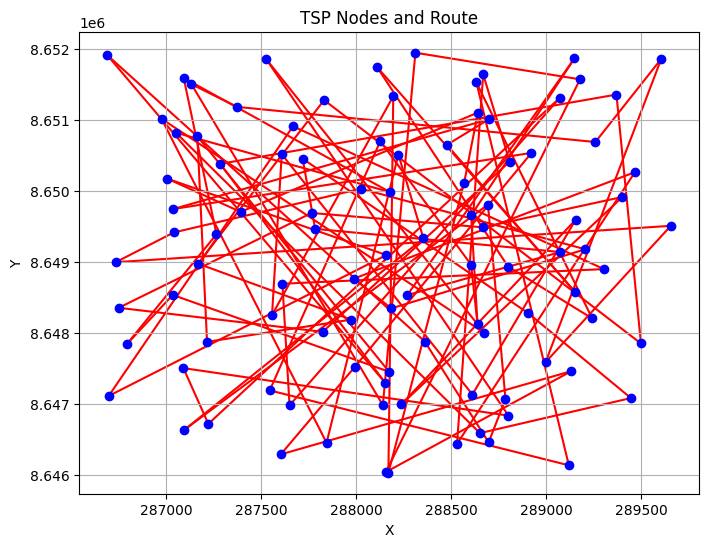

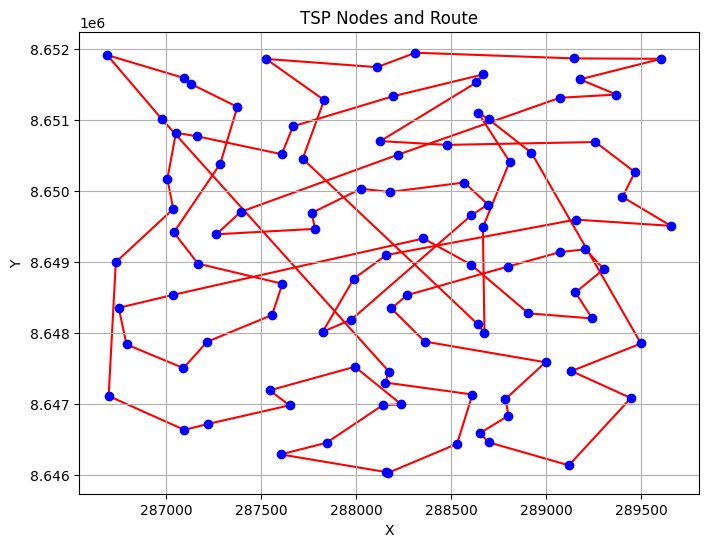


 'good' solution: [56 58 80 97 79 96 95 76 78 57 60 61 81 83 85 65 86 87 99 84 98 71 72 50
 73 77 82 59 35 31 15 30 47 69 88 89 90 70 53 20 21 38 36 34 55 52 74 54
 40 42 39 37 75 94 93 92 91 51 33 48 68 49 32 18 17  4  5  6  9 13 14 27
 28 26 41 64 44 45 29 46 67 66 62 43 63  2  0  1  3 16 19  7 23 22 24 25
 12 11 10  8]

 fitness: 59264.471088402126
Tiempo de ejecución: 37.08429217338562


In [207]:
import time

# Extraer coordenadas como array
N = len(df_reduced) # cantidad de conexiones
positions = df_reduced[['x', 'y']].values
TSP= squareform(pdist(positions, 'euclidean'))

inicio_hc = time.time()
solution,fitness_hc = hill_climbing(N,positions,TSP)
fin_hc = time.time()


plot_tsp(positions, solution)

print("\n 'good' solution:", solution)
print("\n fitness:",fitness_hc)
print("Tiempo de ejecución:",fin_hc-inicio_hc)

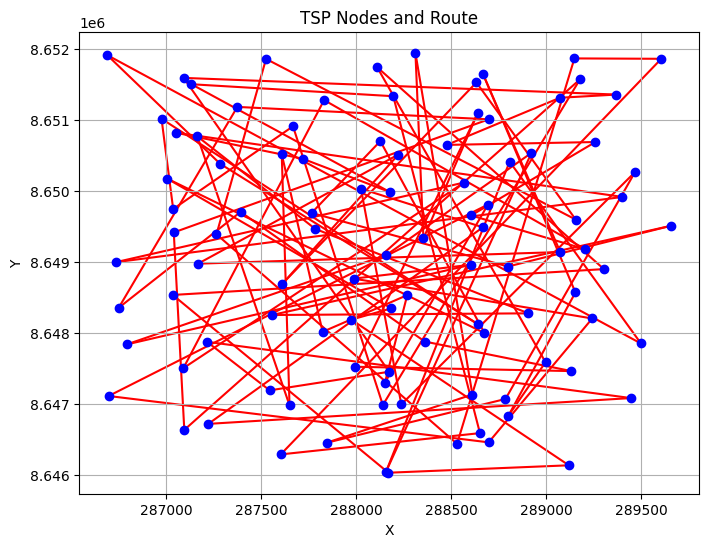

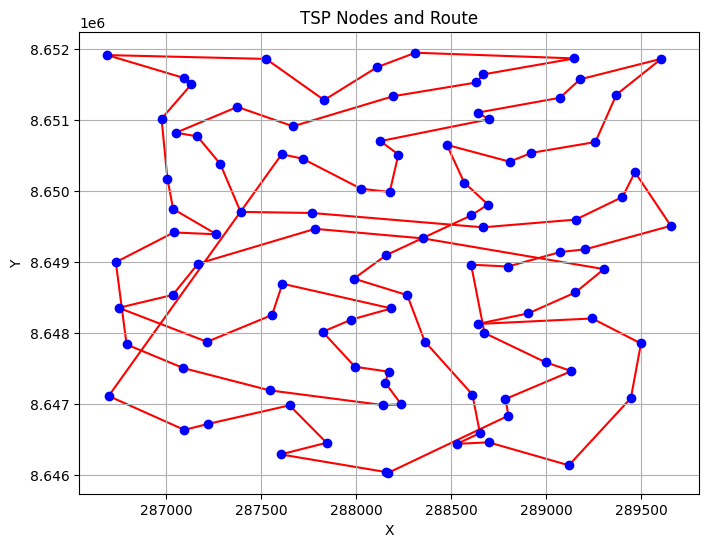


 'good' solution: [13 14 27 28 45 29 46 67 85 83 84 81 82 58 78 76 95 94 92 93 75 77 36 20
 19 17  4 16 32 49 48 68 69 47 30 31 15  0  1  3  2  5  6 21  7  9 11 12
 26 44 64 43 63 41 42 40 60 22 24 25 10  8 23 38 56 96 79 80 59 97 98 99
 87 86 66 65 62 61 57 39 37 54 74 52 51 73 71 91 90 88 89 70 50 72 33 53
 55 34 35 18]

 fitness: 46521.85499587184
Tiempo de ejecución: 28.69635510444641


In [208]:
T_max = 1000
T_min = 0.000001
#T_min = 0.1
cooling_rate = 0.9999

# Extraer coordenadas como array
N = len(df_reduced) # cantidad de conexiones
positions = df_reduced[['x', 'y']].values
TSP= squareform(pdist(positions, 'euclidean'))


inicio_sa = time.time()
sol, fitness_sa,E = simulated_annealing(T_max, T_min, cooling_rate,positions,TSP)
fin_sa = time.time()

plot_tsp(positions, sol)
print("\n 'good' solution:", sol)
print("\n fitness:",fitness_sa)
print("Tiempo de ejecución:",fin_sa-inicio_sa)

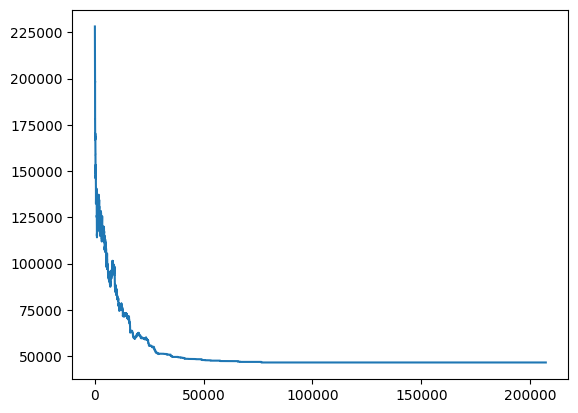

In [209]:
from matplotlib import pyplot as ptl
ptl.plot(list(range(len(E))),E)